In [ ]:
import pandas as np
df = np.read_csv('text.csv')
df.head(5)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


0: sadness, 1: joy, 2: love, 3: anger, 4: fear, 5: surprise


In [ ]:
df.label.unique()

array([ 4.,  0.,  2.,  1.,  5.,  3., nan])

In [ ]:
y = 100 * df.label.value_counts()/df.label.count()
y.sort_index(inplace= True)

In [ ]:
y

0.0    29.406844
1.0    33.791753
2.0     8.171968
3.0    13.615866
4.0    11.285682
5.0     3.727887
Name: label, dtype: float64

In [ ]:
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
f = np.DataFrame(y)#, columns={'label':'percent'})
f['labels'] = labels
f.set_index('labels', inplace= True)
print(f)

              label
labels             
sadness   29.455471
joy       33.984733
love       7.877863
anger     13.577608
fear      11.430025
surprise   3.674300


In [ ]:
f['labels'] = f.index
f

,label,labels
labels,,
sadness,29.455471,sadness
joy,33.984733,joy
love,7.877863,love
anger,13.577608,anger
fear,11.430025,fear
surprise,3.674300,surprise


Text(0.5, 1.0, 'Count of Categories')

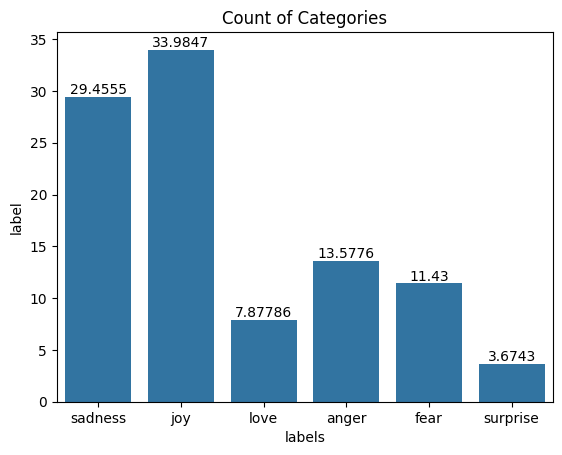

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data= f, x = f['labels'], y= f['label'])
ax.bar_label(ax.containers[0])
plt.title('Percent of Categories')


In [ ]:
!pip install nltk

Text Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def cleen_text(sentence):
    # remove stop words
    stop = stopwords.words('english')
    text = ' '.join([word for word in sentence.split() if word.lower() not in stop])

    # Lemmatize text
    wnl = WordNetLemmatizer()
    list2 = nltk.word_tokenize(text)
    text = ' '.join([wnl.lemmatize(words) for words in list2])

    # white_space
    text = re.sub(r'\s{2,}', '  ', text)

    # remove_non_alphanumeric
    text = ''.join(char for char in text if char not in string.punctuation)

    return text


df['text_cleaned'] = df['text'].apply(cleen_text)

In [ ]:
df.head()

,Unnamed: 0,text,label,text_cleaned
0,0,i just feel really helpless and heavy hearted,4.0,feel really helpless heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0.0,ive enjoyed able slouch relax unwind frankly n...
2,2,i gave up my internship with the dmrg and am f...,4.0,gave internship dmrg feeling distraught
3,3,i dont know i feel so lost,0.0,dont know feel lost
4,4,i am a kindergarten teacher and i am thoroughl...,4.0,kindergarten teacher thoroughly weary job take...


In [ ]:
df.dropna(inplace = True)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text_cleaned'], df['label'], test_size=0.2, random_state=42)
X_train.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
X_train_bow

<39207x500 sparse matrix of type '<class 'numpy.float64'>'
	with 185564 stored elements in Compressed Sparse Row format>

# Machine Learning Models


logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import f1_score

classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)
predictions = classifier.predict(X_test_bow)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
# print('predictions', predictions)
f1_score = f1_score(y_test, predictions, average='macro')
print("f1_score:", f1_score)
recall = recall_score(y_test, predictions, average=None)
print("recall:", recall)

Accuracy: 0.7483166700673332
f1_score: 0.7096797559410458
recall: [0.83550824 0.82450331 0.54780362 0.64347826 0.60516252 0.5923913 ]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_bow, y_train)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
test_pred_decision_tree = clf.predict(X_test_bow)
f1_score = f1_score(y_test, test_pred_decision_tree, average='macro')
print("f1_score:", f1_score)
recall = recall_score(y_test, test_pred_decision_tree, average=None)
print("recall:", recall)

Accuracy: 0.7483166700673332
f1_score: 0.6481956986945746
recall: [0.74244505 0.72275738 0.49612403 0.64637681 0.60611855 0.5923913 ]


# Deep Learning Models


In [ ]:
# from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
# from keras.utils import pad_sequences
from keras.layers import Embedding

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional, GRU
from keras.layers import BatchNormalization

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train_sequences)

[[4, 264, 61, 396, 735, 1089, 1, 304, 8995, 1127, 12284, 70, 4, 2758], [2878, 1037, 294, 1278, 65, 926, 445, 1, 560, 4, 685, 1037, 1037, 68, 4979, 317, 22, 1141], [1, 3, 86, 25, 38, 376, 19, 1063, 6, 15], [949, 12285, 6282, 2995, 2996, 1015, 2, 247, 326, 177, 251], [1, 441], [1, 3, 5, 507, 144, 16], [1, 1420, 28, 182, 6283, 174, 4540], [1, 4541, 152, 330, 492, 7328, 736, 4542, 346, 2997, 1509, 988, 459, 927, 927], [15, 1098, 3676, 1896, 10, 1, 365, 287], [1, 3, 302, 3290], [112, 1, 233, 114, 1071, 523, 720, 967, 33, 8996], [55, 3914, 690, 2, 168, 761, 690, 8997, 4980, 4219], [1, 331, 169, 92], [1, 9, 4981, 2254, 561, 643, 43, 88, 330, 935, 4982, 461, 541, 2998, 6284, 20, 12286, 1985, 12287, 88, 4220], [1, 22, 4983, 69, 5535, 656, 2310, 1949], [1, 670, 5536, 48, 1986, 727, 114, 3477, 7329, 4543, 141, 619, 77, 367, 1897, 12288, 81, 322, 141, 3478, 244, 1987], [36, 1142, 99, 6, 60, 8998, 1298, 606, 3155, 12289, 1, 508, 720, 257, 32, 3677, 251, 87, 4, 4544, 720, 115, 29, 33, 3291, 1045, 13

In [ ]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 32


In [ ]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[ 393 1335 5030 ...    0    0    0]
 [   4    2  360 ...    0    0    0]
 [   1  511  578 ...    0    0    0]
 ...
 [   1 1502    1 ...    0    0    0]
 [9296 1548   10 ...    0    0    0]
 [   4    2   91 ...    0    0    0]]

X_test_padded:
[[    4  4124  4905 ...     0     0     0]
 [   29   102    86 ...     0     0     0]
 [   14   288   554 ...     0     0     0]
 ...
 [    1  1106   720 ...     0     0     0]
 [   18    21  2237 ...     0     0     0]
 [  129    58 10398 ...     0     0     0]]


In [ ]:
input_Size = len(tokenizer.word_index) + 1
input_Size

10399

In [ ]:
# Define the model
model = keras.Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
model.add(keras.layers.Dropout(0.5))


# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())

model.add(Bidirectional(GRU(64)))

# Add output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 32, 50)            519950    
                                                                 
 dropout_1 (Dropout)         (None, 32, 50)            0         
                                                                 
 bidirectional_6 (Bidirecti  (None, 32, 240)           123840    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 32, 128)           117504    
 onal)                                                           
                                                                 
 batch_normalization_2 (Bat  (None, 32, 128)           512       
 chNormalization)                                                
                                                      

In [ ]:
# Model Train
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5
6/6 [==============================] - 40s 4s/step - loss: 1.6362 - accuracy: 0.3247 - val_loss: 1.7730 - val_accuracy: 0.2692
Epoch 2/5
6/6 [==============================] - 25s 4s/step - loss: 1.5372 - accuracy: 0.3948 - val_loss: 1.7652 - val_accuracy: 0.4529
Epoch 3/5
6/6 [==============================] - 26s 4s/step - loss: 1.4181 - accuracy: 0.4915 - val_loss: 1.7558 - val_accuracy: 0.4952
Epoch 4/5
6/6 [==============================] - 23s 4s/step - loss: 1.2186 - accuracy: 0.5598 - val_loss: 1.7338 - val_accuracy: 0.5557
Epoch 5/5
6/6 [==============================] - 24s 4s/step - loss: 0.9771 - accuracy: 0.6543 - val_loss: 1.6953 - val_accuracy: 0.6163


In [ ]:
# Evaluate Test Data
model.evaluate(X_test_padded, y_test)

62/62 [==============================] - 2s 39ms/step - loss: 1.6953 - accuracy: 0.6163


[1.6953284740447998, 0.616284966468811]

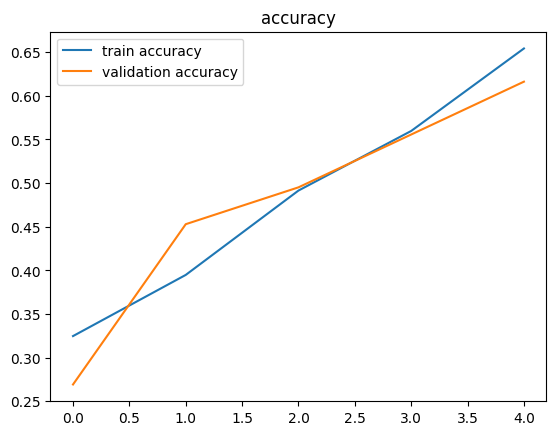

In [ ]:
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'])
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.legend(['train accuracy', 'validation accuracy'])
plt.title('accuracy')
plt.show()

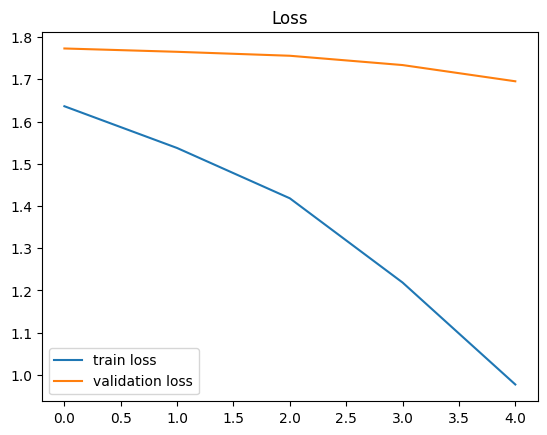

In [ ]:
plt.plot(range(len(history.history['loss'])),history.history['loss'])
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'])
plt.legend(['train loss', 'validation loss'])
plt.title('Loss')
plt.show()

https://www.kaggle.com/code/abdmental01/emotions-analysis-gru-94/notebook


# Pre-trained Models and Transfer Learning


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification, Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = df.sample(frac=1)
label_counts = df['label'].value_counts(normalize=True) * 1000  # Assuming 1000 is the sample size you want
# print(label_counts)

_, sample_df = train_test_split(df, test_size=1000, stratify=df['label'], random_state=42)
df_train, df_test = train_test_split(sample_df, test_size=0.2, stratify=sample_df['label'], random_state=42)


In [ ]:
# Load BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
unique_labels = df_train['label'].nunique()  # Adjust for your dataset
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=unique_labels)
def tokenize_function(df):
    return tokenizer(df["text"].tolist(), padding="max_length", truncation=True, max_length=512)


def compute_metrics(eval_pred):
    preds = eval_pred.predictions.argmax(axis=1)
    true_labels = eval_pred.label_ids
    accuracy = accuracy_score(true_labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, preds, average=None)
    macro_f1 = f1.mean()
    return {
        'accuracy': accuracy,
        'macro_f1': macro_f1,
        'precision': precision.tolist(),
        'recall': recall.tolist(),
        'f1': f1.tolist(),
    }

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenized_inputs_train = tokenize_function(df_train)
tokenized_inputs_test = tokenize_function(df_test)

# Convert to Hugging Face's Dataset format
from datasets import Dataset

train_dataset = Dataset.from_dict({**tokenized_inputs_train, 'labels': df_train['label'].tolist()})
test_dataset = Dataset.from_dict({**tokenized_inputs_test, 'labels': df_test['label'].tolist()})


In [ ]:
!pip install transformers[torch] accelerate -U


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    do_eval=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1,Precision,Recall,F1
1,No log,1.191238,0.565000,0.247433,"[0.46218487394957986, 0.7307692307692307, 0.0, 0.0, 0.3333333333333333, 0.0]","[0.9482758620689655, 0.8507462686567164, 0.0, 0.0, 0.043478260869565216, 0.0]","[0.6214689265536724, 0.786206896551724, 0.0, 0.0, 0.07692307692307691, 0.0]"


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Trainer is attempting to log a value of "[0.46218487394957986, 0.7307692307692307, 0.0, 0.0, 0.3333333333333333, 0.0]" of type <class 'list'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.9482758620689655, 0.8507462686567164, 0.0, 0.0, 0.043478260869565216, 0.0]" of type <class 'list'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.6214689265536724, 0.786206896551724, 0.0, 0.0, 0.07692307692307691, 0.0]" of type <class 'list

TrainOutput(global_step=100, training_loss=1.3989669799804687, metrics={'train_runtime': 5251.6619, 'train_samples_per_second': 0.152, 'train_steps_per_second': 0.019, 'total_flos': 210496403865600.0, 'train_loss': 1.3989669799804687, 'epoch': 1.0})

In [ ]:
!pip install datasets


In [ ]:
print(tokenized_inputs_train.keys())


dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [ ]:
from datasets import Dataset

# Directly convert the tokenized inputs to Dataset objects
train_dataset = Dataset.from_dict(tokenized_inputs_train)
test_dataset = Dataset.from_dict(tokenized_inputs_test)

train_dataset

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2400
})

In [ ]:
print(train_dataset.column_names)


['input_ids', 'token_type_ids', 'attention_mask']
